In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
!unzip -q "/content/data.zip"

In [4]:
data = pd.read_csv('/content/_churn_training_data.csv')
data.head(10)

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
data.shape

(6499, 21)

In [6]:
data.dtypes

CustomerID            object
Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                 object
dtype: object

In [7]:
def removespaces(data):
    newll = []
    for dd in data.columns:
        if " " in dd:
            newll.append(''.join(dd.split(" ")))
        else:
            newll.append(dd)
    data.columns = newll
    return data

In [8]:
data = removespaces(data)
data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
data.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
Churn               0
dtype: int64

In [11]:
data[data['TotalCharges'].isnull()]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [12]:
data['TotalCharges'].isnull().sum()

9

In [13]:
data["TotalCharges"] = data["TotalCharges"].apply(lambda x: x if not pd.isnull(x) else round(data['TotalCharges'].mean()))

In [14]:
data["TotalCharges"].isnull().sum()

0

In [15]:
data["Contract"].value_counts()

Month-to-month    3576
Two year          1565
One year          1358
Name: Contract, dtype: int64

In [16]:
for col in data:
    print(col)
    print(data[col].unique())
    print('\n')

CustomerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '2474-BRUCM' '4062-HBMOS'
 '0742-NXBGR']


Gender
['Female' 'Male']


SeniorCitizen
[0 1]


Partner
['Yes' 'No']


Dependents
['No' 'Yes']


Tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


PhoneService
['No' 'Yes']


MultipleLines
['No phone service' 'No' 'Yes']


InternetService
['DSL' 'Fiber optic' 'No']


OnlineSecurity
['No' 'Yes' 'No internet service']


OnlineBackup
['Yes' 'No' 'No internet service']


DeviceProtection
['No' 'Yes' 'No internet service']


TechSupport
['No' 'Yes' 'No internet service']


StreamingTV
['No' 'Yes' 'No internet service']


StreamingMovies
['No' 'Yes' 'No internet service']


Contract
['Month-to-month' 'One year' 'Two year']


PaperlessBilling
['Yes' 'No']


PaymentMethod
['Electronic check' 'Mailed check' 'Bank tran

In [17]:
data.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
from pandas.core.dtypes.common import is_numeric_dtype , is_string_dtype

In [19]:
for i in data.columns:
    if is_string_dtype(data[i]):
        print(i)
        data[i] = data[i].str.lower()

CustomerID
Gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


In [20]:
data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


In [21]:
data.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
# Function for analysing categorical features
def plot_data(feature):
    pd.value_counts(feature).plot.bar()
    plt.title(feature.name +  ' class histogram')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    print(feature.value_counts())

In [26]:
print(data.columns)

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


male      3290
female    3209
Name: Gender, dtype: int64


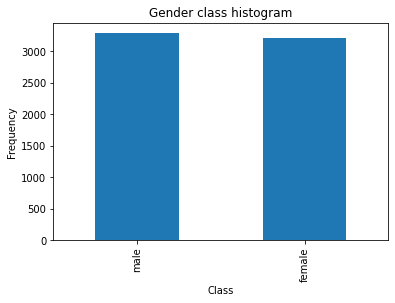

In [24]:
plot_data(data['Gender'])

0    5443
1    1056
Name: SeniorCitizen, dtype: int64


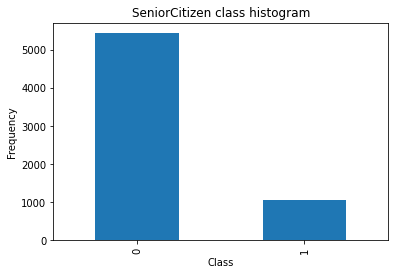

In [27]:
plot_data(data['SeniorCitizen'])

no     3359
yes    3140
Name: Partner, dtype: int64


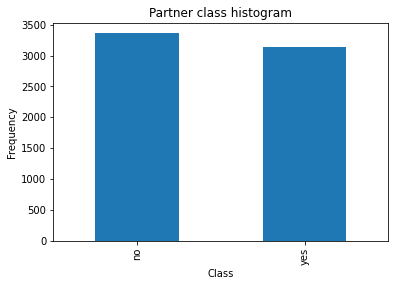

In [28]:
plot_data(data['Partner'])

no     4561
yes    1938
Name: Dependents, dtype: int64


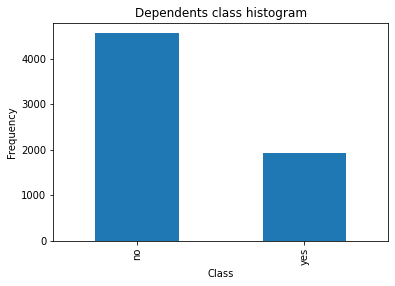

In [29]:
plot_data(data['Dependents'])

yes    5884
no      615
Name: PhoneService, dtype: int64


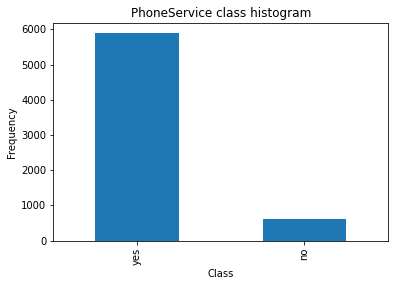

In [31]:
plot_data(data['PhoneService'])

no                  3138
yes                 2746
no phone service     615
Name: MultipleLines, dtype: int64


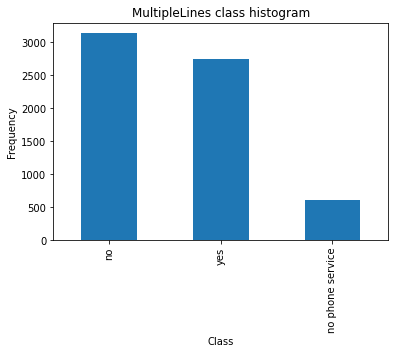

In [32]:
plot_data(data['MultipleLines'])

fiber optic    2860
dsl            2217
no             1422
Name: InternetService, dtype: int64


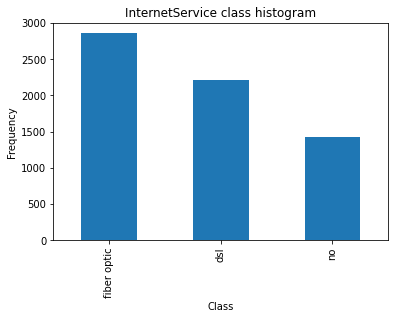

In [33]:
plot_data(data['InternetService'])

no                     3208
yes                    1869
no internet service    1422
Name: OnlineSecurity, dtype: int64


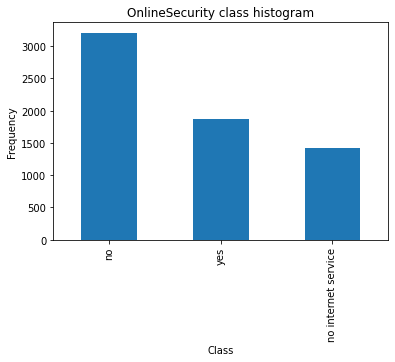

In [34]:
plot_data(data['OnlineSecurity'])

no                     2855
yes                    2222
no internet service    1422
Name: OnlineBackup, dtype: int64


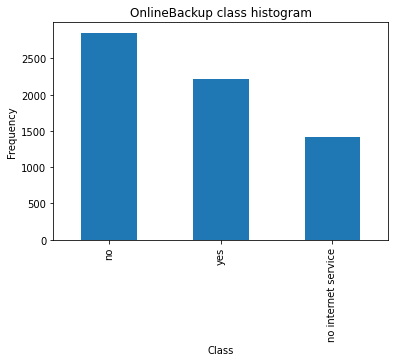

In [35]:
plot_data(data['OnlineBackup'])

no                     2843
yes                    2234
no internet service    1422
Name: DeviceProtection, dtype: int64


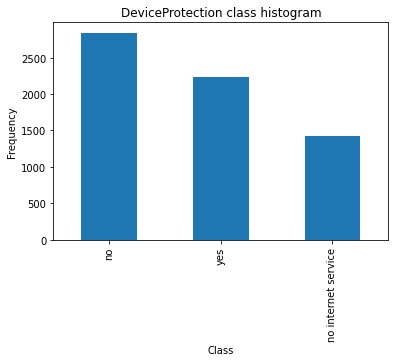

In [36]:
plot_data(data['DeviceProtection'])

no                     3209
yes                    1868
no internet service    1422
Name: TechSupport, dtype: int64


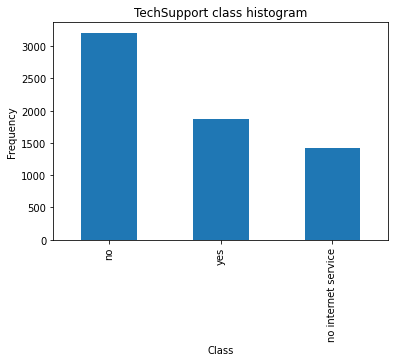

In [37]:
plot_data(data['TechSupport'])

no                     2589
yes                    2488
no internet service    1422
Name: StreamingTV, dtype: int64


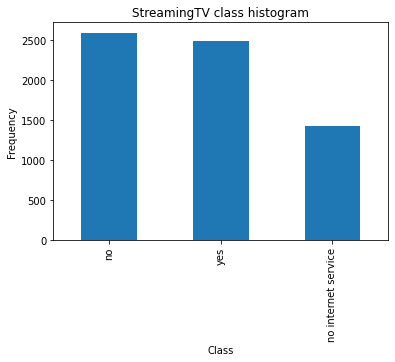

In [38]:
plot_data(data['StreamingTV'])

no                     2555
yes                    2522
no internet service    1422
Name: StreamingMovies, dtype: int64


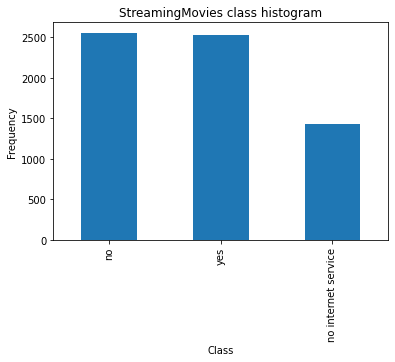

In [39]:
plot_data(data['StreamingMovies'])

month-to-month    3576
two year          1565
one year          1358
Name: Contract, dtype: int64


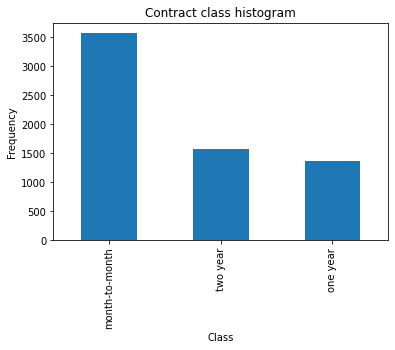

In [40]:
plot_data(data['Contract'])

yes    3836
no     2663
Name: PaperlessBilling, dtype: int64


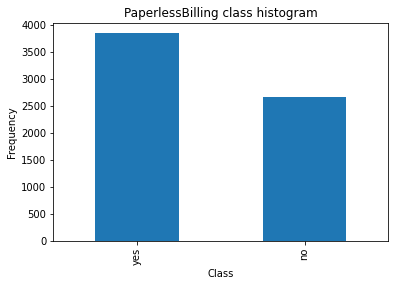

In [41]:
plot_data(data['PaperlessBilling'])

no     3359
yes    3140
Name: Partner, dtype: int64


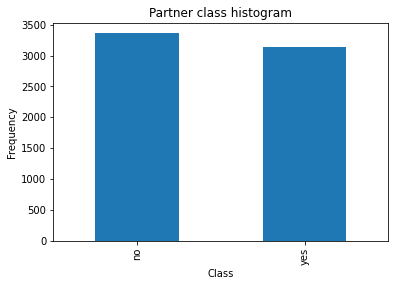

In [42]:
plot_data(data['Partner'])

electronic check             2182
mailed check                 1485
bank transfer (automatic)    1426
credit card (automatic)      1406
Name: PaymentMethod, dtype: int64


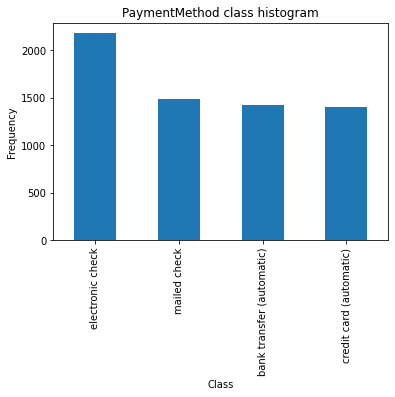

In [43]:
plot_data(data['PaymentMethod'])

no     4784
yes    1715
Name: Churn, dtype: int64


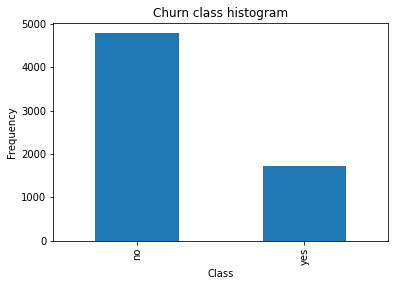

In [46]:
plot_data(data['Churn'])

**Observations from above plots :**

1: gender:- Has almost equal ratios of Male and Female

2: SeniorCitizen:- Number of Senior Citizens are way less than normal citizens

3: Partner:- Has almost equal ratios of Partners and Non-Partners

4: Dependents:- Number of Dependent users are way less than Non-Dependent Users

5: PhoneService:- People who don't have Phone service are very few.

6: MultipleLines:- MultipleLines are fewer than normal lines and customers who do not have PhoneService do not belong to this category.

7: InternetService:- Fiber optic cable is most common interner service. There is large population which doesn't have internet service

8: OnlineSecurity:- OnlineSecurity is not opted by maximum customers and customers who do not have InternetService do not belong to any category.

9: DeviceProtection:- DeviceProtection is not opted by maximum customers and customers who do not have InternetService do not belong to any category.

10: TechSupport:- TechSupport is not taken by maximum customers and customers who do not have InternetService do not belong to any category.

11: StreamingTV:- StreamingTV is equiprobable between customers who have InternetService and customers who do not have InternetService do not belong to any category.

12: StreamingMovies:- StreamingMovies is equiprobable between customers who have InternetService and customers who do not have InternetService do not belong to any category.

13: Contract:-This is the Target column Month t0 month contract is more likely opted by customers

14: PaperlessBilling:- Most customers have opted for PaperlessBilling

15: PaymentMethod:- Electronic cheques is more preferred method of payment

16: Churn:- This have majority class being a Non-Churner. We would require to balance these before moving to model building !!

In [21]:
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    data[item].replace(to_replace='yes', value=1, inplace=True)
    data[item].replace(to_replace='no',  value=0, inplace=True)
data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,no phone service,dsl,no,yes,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,no,dsl,yes,no,yes,no,no,no,one year,0,mailed check,56.95,1889.50,0
2,3668-qpybk,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,no phone service,dsl,yes,no,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


In [22]:
data.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
Tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [23]:
df = data

In [24]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,no phone service,dsl,no,yes,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,no,dsl,yes,no,yes,no,no,no,one year,0,mailed check,56.95,1889.50,0
2,3668-qpybk,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,no phone service,dsl,yes,no,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


In [25]:
df['Contract'].value_counts()

month-to-month    3576
two year          1565
one year          1358
Name: Contract, dtype: int64

In [26]:
month_contract = df[df['Contract'] == "month-to-month"]
month_contract = month_contract.sample(1400)

In [27]:
one_year_contract = df[df['Contract'] == "one year"]
one_year_contract.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-gnvde,male,0,0,0,34,1,no,dsl,yes,no,yes,no,no,no,one year,0,mailed check,56.95,1889.50,0
3,7795-cfocw,male,0,0,0,45,0,no phone service,dsl,yes,no,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
9,6388-tabgu,male,0,0,1,62,1,no,dsl,yes,yes,no,no,no,no,one year,0,bank transfer (automatic),56.15,3487.95,0
12,8091-ttvax,male,0,1,0,58,1,yes,fiber optic,no,no,yes,no,yes,yes,one year,0,credit card (automatic),100.35,5681.10,0
16,8191-xwszg,female,0,0,0,52,1,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,one year,0,mailed check,20.65,1022.95,0


In [28]:
two_year_contract = df[df['Contract'] == "two year"]
two_year_contract.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-lkbci,male,0,0,0,16,1,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,0,credit card (automatic),18.95,326.80,0
15,3655-snqyz,female,0,1,1,69,1,yes,fiber optic,yes,yes,yes,yes,yes,yes,two year,0,credit card (automatic),113.25,7895.15,0
17,9959-wofkt,male,0,0,1,71,1,yes,fiber optic,yes,no,yes,no,yes,yes,two year,0,bank transfer (automatic),106.70,7382.25,0
23,3638-weabw,female,0,1,0,58,1,yes,dsl,no,yes,no,yes,no,no,two year,1,credit card (automatic),59.90,3505.10,0
28,5248-ygijn,male,0,1,0,72,1,yes,dsl,yes,yes,yes,yes,yes,yes,two year,1,credit card (automatic),90.25,6369.45,0


In [29]:
main_df = pd.concat([month_contract, one_year_contract,two_year_contract], axis=0)
main_df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5377,8313-ktihg,male,0,0,0,4,1,no,dsl,no,no,no,yes,yes,no,month-to-month,1,electronic check,61.30,249.40,0
3608,3208-ypioe,male,0,0,0,39,1,yes,fiber optic,no,no,no,no,no,no,month-to-month,0,electronic check,75.25,3017.65,1
121,2928-hldba,female,0,0,0,6,1,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,0,mailed check,20.70,112.75,0
6172,6379-rxjrq,male,0,1,0,10,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.10,659.65,1
2947,5131-ponji,male,0,1,1,49,1,no,fiber optic,no,yes,yes,no,yes,no,month-to-month,1,credit card (automatic),90.40,4494.65,0


In [36]:
main_df.shape

(4323, 20)

In [38]:
main_df.drop("Churn",axis = 1 ,inplace=True)

In [39]:
try:
    label = main_df['Contract']
    del main_df['Contract']
except:
    print("label already removed.")

In [40]:
label.shape

(4323,)

In [41]:
ml_dummies = pd.get_dummies(main_df)
#ml_dummies.fillna(value=0, inplace=True)
ml_dummies.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Gender_female,Gender_male,MultipleLines_no,MultipleLines_no phone service,MultipleLines_yes,InternetService_dsl,InternetService_fiber optic,InternetService_no,OnlineSecurity_no,OnlineSecurity_no internet service,OnlineSecurity_yes,OnlineBackup_no,OnlineBackup_no internet service,OnlineBackup_yes,DeviceProtection_no,DeviceProtection_no internet service,DeviceProtection_yes,TechSupport_no,TechSupport_no internet service,TechSupport_yes,StreamingTV_no,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
5377,0,0,0,4,1,1,61.30,249.40,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
3608,0,0,0,39,1,0,75.25,3017.65,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
121,0,0,0,6,1,0,20.70,112.75,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
6172,0,1,0,10,1,1,70.10,659.65,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2947,0,1,1,49,1,1,90.40,4494.65,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0


In [42]:
len(ml_dummies.columns)

38

In [43]:
ml_dummies = removespaces(ml_dummies)

In [44]:
for i in ml_dummies.columns:
    print(i)

SeniorCitizen
Partner
Dependents
Tenure
PhoneService
PaperlessBilling
MonthlyCharges
TotalCharges
Gender_female
Gender_male
MultipleLines_no
MultipleLines_nophoneservice
MultipleLines_yes
InternetService_dsl
InternetService_fiberoptic
InternetService_no
OnlineSecurity_no
OnlineSecurity_nointernetservice
OnlineSecurity_yes
OnlineBackup_no
OnlineBackup_nointernetservice
OnlineBackup_yes
DeviceProtection_no
DeviceProtection_nointernetservice
DeviceProtection_yes
TechSupport_no
TechSupport_nointernetservice
TechSupport_yes
StreamingTV_no
StreamingTV_nointernetservice
StreamingTV_yes
StreamingMovies_no
StreamingMovies_nointernetservice
StreamingMovies_yes
PaymentMethod_banktransfer(automatic)
PaymentMethod_creditcard(automatic)
PaymentMethod_electroniccheck
PaymentMethod_mailedcheck


In [45]:
ml_dummies.shape

(4323, 38)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
feature_train, feature_test, label_train, label_test = train_test_split(ml_dummies, label, test_size=0.3)

In [47]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(feature_train, label_train)
score = clf.score(feature_test, label_test)
print (round(score,3))

0.663


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(feature_train, label_train)
score_rf = rf_clf.score(feature_test, label_test)
print (round(score_rf,3))

0.658


In [50]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [51]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [52]:
rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(feature_test, label_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=2,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [53]:
score_rf_updated = rf_random.score(feature_test, label_test)
print (round(score_rf_updated,3))

0.846


In [63]:
test = ml_dummies.head(1)
test

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Gender_female,Gender_male,MultipleLines_no,MultipleLines_nophoneservice,MultipleLines_yes,InternetService_dsl,InternetService_fiberoptic,InternetService_no,OnlineSecurity_no,OnlineSecurity_nointernetservice,OnlineSecurity_yes,OnlineBackup_no,OnlineBackup_nointernetservice,OnlineBackup_yes,DeviceProtection_no,DeviceProtection_nointernetservice,DeviceProtection_yes,TechSupport_no,TechSupport_nointernetservice,TechSupport_yes,StreamingTV_no,StreamingTV_nointernetservice,StreamingTV_yes,StreamingMovies_no,StreamingMovies_nointernetservice,StreamingMovies_yes,PaymentMethod_banktransfer(automatic),PaymentMethod_creditcard(automatic),PaymentMethod_electroniccheck,PaymentMethod_mailedcheck
5377,0,0,0,4,1,1,61.3,249.4,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0


In [65]:
test.shape

(1, 38)

In [64]:
rf_random.predict(test)

array(['month-to-month'], dtype=object)

In [54]:
pred = rf_random.predict(feature_test)

Confusion matrix, without normalization
[[397  41  11]
 [ 37 284  65]
 [  8  38 416]]
Normalized confusion matrix
[[0.88 0.09 0.02]
 [0.1  0.74 0.17]
 [0.02 0.08 0.9 ]]


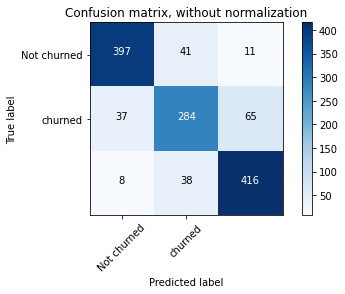

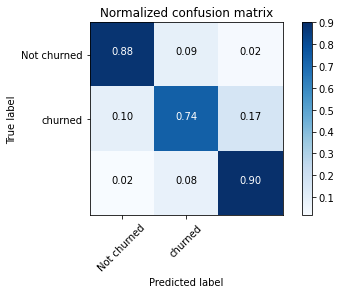

In [55]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [56]:
from sklearn.metrics import classification_report
print(classification_report(label_test, pred))

                precision    recall  f1-score   support

month-to-month       0.90      0.88      0.89       449
      one year       0.78      0.74      0.76       386
      two year       0.85      0.90      0.87       462

      accuracy                           0.85      1297
     macro avg       0.84      0.84      0.84      1297
  weighted avg       0.84      0.85      0.84      1297



In [57]:
# loading library
import pickle

In [58]:
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(rf_random, files)

In [66]:
# load saved model
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [67]:
lr.predict(test)

array(['month-to-month'], dtype=object)

KNeighborsClassifier
0.634 
 - - - - -  

DecisionTreeClassifier
0.663 
 - - - - -  



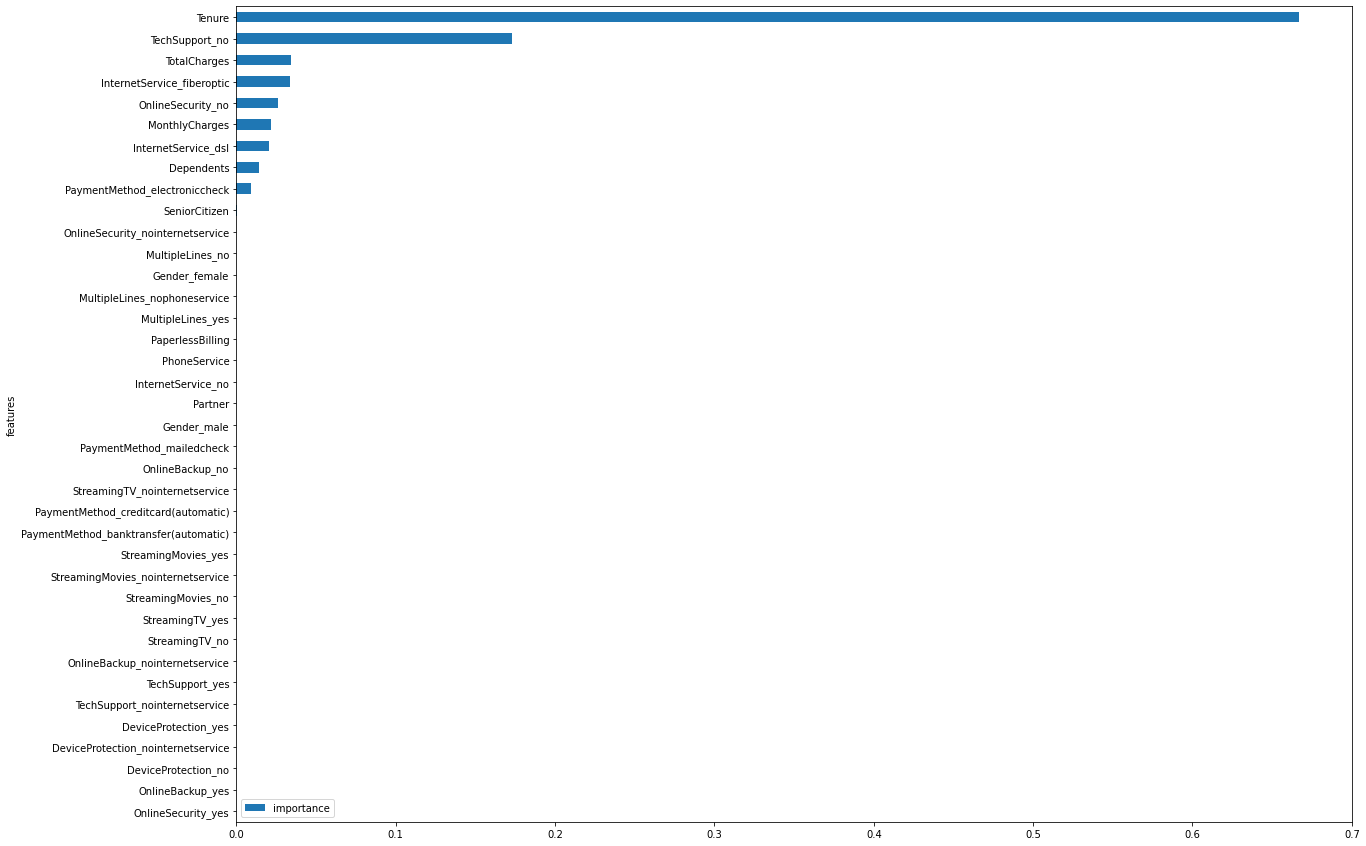

In [59]:
classifiers = [
    KNeighborsClassifier(5),    
    DecisionTreeClassifier(max_depth=5)
]
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    clf = item
    clf.fit(feature_train, label_train)
    pred = clf.predict(feature_test)
    score = clf.score(feature_test, label_test)
    print (round(score,3),"\n", "- - - - - ", "\n")
    
feature_df = pd.DataFrame()
feature_df['features'] = ml_dummies.columns
feature_df['importance'] = clf.feature_importances_
feature_df.sort_values(by='importance', ascending=False)    
feature_df.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))